In [2]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
print('Origin feature example: ', iris.data[0:5])  # 鸢尾花数据集数据包含四个特征

Origin feature example:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
selector = SelectKBest(chi2, k=2).fit(iris.data, iris.target)  # 过滤两个最优特征
new_data = selector.transform(iris.data)
print('New feature example: ', new_data[0:5])  # 降维后的特征

New feature example:  [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [5]:
print('Score of each dim feature: ', selector.scores_)  # 输出每一个维度特征的得分

Score of each dim feature:  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]


In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # 基模型
from sklearn.datasets import load_iris
import logging
iris = load_iris()

In [54]:
logging.getLogger().setLevel(logging.WARNING)
model = LogisticRegression(n_jobs=3)
selector = RFE(estimator=model, n_features_to_select=2).fit(iris.data, iris.target)
data = selector.transform(iris.data)
print('New feature example: ', data[0:5])  # 降维后的特征

New feature example:  [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [55]:
print('Rank of feature: ', selector.ranking_)

Rank of feature:  [3 2 1 1]


In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier  # 基模型
from sklearn.datasets import load_iris
iris = load_iris()

In [58]:
selector = SelectFromModel(estimator=GradientBoostingClassifier()).fit(iris.data, iris.target)
data = selector.transform(iris.data)
print('New feature example: ', data[0:5])  # 降维后的特征

New feature example:  [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [59]:
print('Importance of each dim feature: ', selector.estimator_.feature_importances_)

Importance of each dim feature:  [0.00597287 0.01282788 0.30699283 0.67420641]


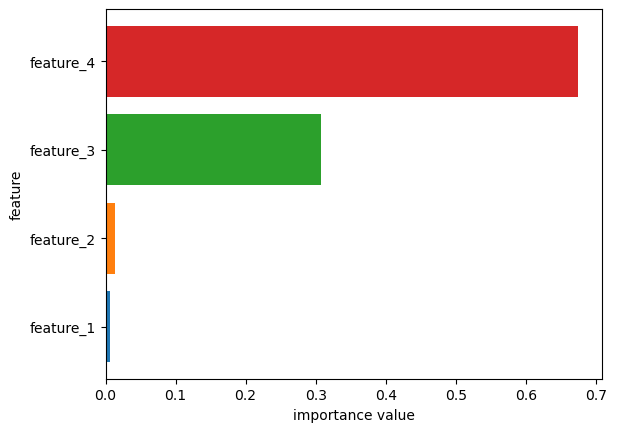

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
feature_list = ['feature_1', 'feature_2','feature_3','feature_4']
df = pd.DataFrame(selector.estimator_.feature_importances_)

# df.sort_values()
for i in range(4): 
        plt.barh(feature_list[i], selector.estimator_.feature_importances_[i])
plt.ylabel('feature')
plt.xlabel('importance value')
plt.show();